In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# read dat file
def reaDat(filename):
    # read dat to a list of lists
    data = [i.strip().split() for i in open("../data/"+filename).readlines()]
    data_df = pd.DataFrame(data)
    
    # change datatype from str to int
    data_df = data_df.astype({0:'int'})
    
#     fig, ax = plt.subplots()
#     ax.plot(xlim, data_df,'o-')

    return data_df

In [3]:
# time series plot
def plotDat(ts, xlim):
    fig, ax = plt.subplots()
    ax.plot(xlim,ts,'o-')

$\textbf{Example 1.1}$

In [4]:
sunspots = reaDat("spots.dat")

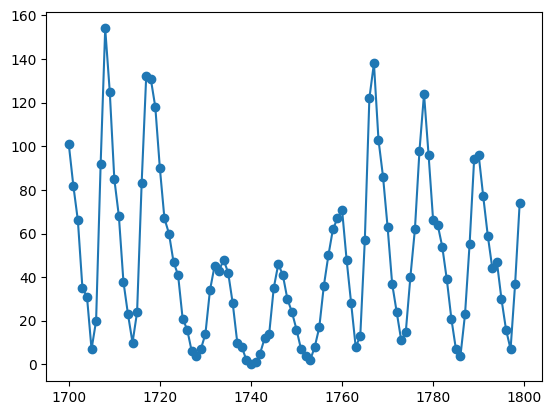

In [5]:
plotDat(sunspots,range(1700,1800))

$\textbf{Example 1.2}$

In [25]:
lynx = reaDat("lynx.dat")
lynx['log'] = np.log10(lynx[0])

In [26]:
lynx.head()

,0,log
0,269,2.429752
1,321,2.506505
2,585,2.767156
3,871,2.940018
4,1475,3.168792


In [29]:
end = 1821+len(lynx)

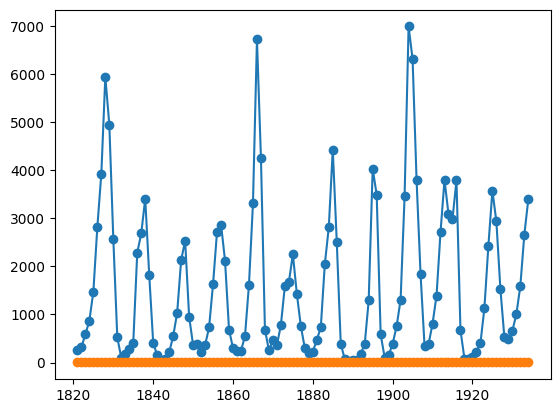

In [30]:
plotDat(lynx,range(1821,end))

$\textbf{Example 1.3}$

In [44]:
# obtain the file name for title
def geTitle(filename):
    end = filename.find(".")
    return filename[:end]

In [46]:
# read bills data
def readBills(filename):
    # read data
    data = [i.strip().split() for i in open("../data/"+filename).readlines()]
    # check the valid data
    for k in range(50):
        len_sub_list = len(data[k])
        if len_sub_list == 2:
            # store the starting index
            s = k
            for j in range(50):
                if len(data[-j])==2:
                    break
            # slice the data
            # obtain the valid data
            if j!=1:
                d = data[s:1-j]
            else:
                d = data[s:]
            break
    # method1
    # use the date as index
    d_df = pd.DataFrame({x[0]:x[1:] for x in d}).T
    # change datatype from str to int
    d_df = d_df.astype({0:'float'})

    # method2
    # treat the date as one column
    dd = pd.DataFrame(d)
    dd = dd.astype({1:'float'})

    fig,ax = plt.subplots()
    ax.plot(dd[1])
    title = geTitle(filename)
    plt.title(title)
            
#     return d_df,dd


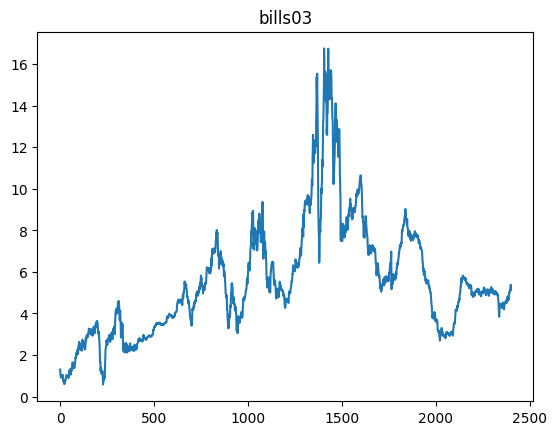

In [47]:
readBills("bills03.dat")

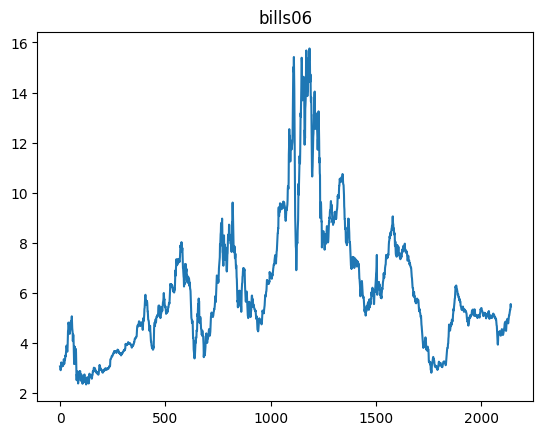

In [48]:
readBills("bills06.dat")

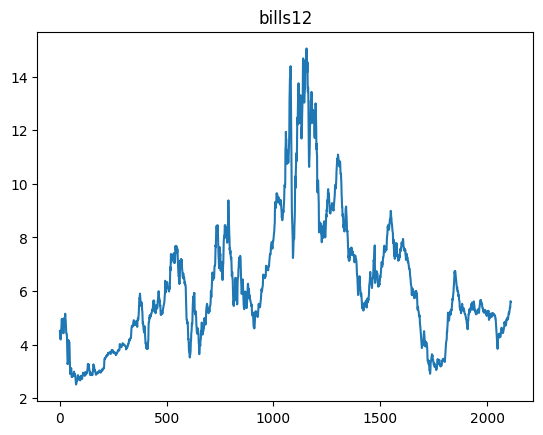

In [49]:
readBills("bills12.dat")

$\textbf{Example 1.4}$

Text(0.5, 1.0, 'sp500')

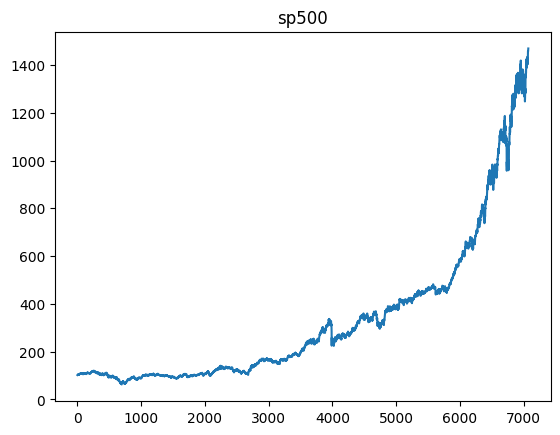

In [51]:
sp500 = [i.strip().split() for i in open("../data/sp500.dat.rtf").readlines()]
for k in range(50):
    len_sub_list = len(sp500[k])
    if len_sub_list == 6: 
        # store the starting index
        s = k
        for j in range(1,50):
            if len(sp500[-j])==5:
                break
        # slice the data
        # obtain the valid data
        if j!=1:
            d = sp500[s:1-j]
        else:
            d = sp500[s:]
        break

        
# reverse rows
d_sp500 = pd.DataFrame(d[12:]).iloc[::-1]
# reverse index
d_sp500.index = d_sp500.index.values[::-1]
d_sp500.head()

# remove the last element "\" or "}"
d_sp500[4]=d_sp500[4].str[:-1]
d_sp500.head()

# change datatype from str to float
d_sp500 = d_sp500.astype({1:'float',2:'float',3:'float',4:'float'})
d_sp500.head()

fig,ax = plt.subplots()
ax.plot(d_sp500[4])
title = geTitle("sp500.dat.rtf")
plt.title(title)